# Week 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
from pandas_datareader import data 
from datetime import datetime
from scipy.optimize import minimize

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import Mahdi as msj

In [4]:
plt.style.use("seaborn-dark")

## The limits of Portfolio diversification
مواردی که تنوع سازی در آنها موثر است: 

1. روشی برای افزایش پاداش در هر واحد ریسک;
2. راه کاهش ریسک **ویژه یا خاص**: در واقع به سرمایه گذاران این امکان را می دهد که ریسک خاص را در پرتفوی خود کاهش دهند، به این ترتیب می توانند به پاداش بالاتری در هر واحد ریسک دست یابند.

**مواردی که تنوع در آنها موثر نیست**:

#### : مهم

1. تنوع بخشی روش موثری برای کاهش ریسک سیستماتیک نیست: اساساً، اگر کل بازار سقوط کند، واقعاً مهم نیست که پرتفوی شما چقدر متنوع است، زیرا سطوح همبستگی تمایل به افزایش دارند و مزایای تنوع تمایل به ناپدید شدن دارند.
 
در ادامه، می‌خواهیم آخرین نکته را برجسته کنیم، یعنی می‌خواهیم نشان دهیم که در صورت بحران مالی بزرگ و ریزش همگانی, تنوع یک سبد, تضمینی برای ریسک کمتر نیست.

In [5]:
# add to msj

def get_ind_file(filetype="rets", nind=30, ew=False):
    '''
    - filetype: can be "rets", "nfirms", "size"
    - nind: 30 or 49
    - ew ===> if True, مجموعه داده های پرتفوهای با وزن یکسان بارگیری می شوند.
    '''
    if nind!=30 and nind!=49:
        raise ValueError("Expected either 30 or 49 number of industries")
    if filetype == "rets":
        portfolio_w = "ew" if ew==True else "vw" 
        name = "{}_rets" .format( portfolio_w )
        divisor = 100.0
    elif filetype == "nfirms":
        name = "nfirms"
        divisor = 1
    elif filetype == "size":
        name = "size"
        divisor = 1
    else:
        raise ValueError("filetype must be one of: rets, nfirms, size")
    ind = pd.read_csv("ind{}_m_{}.csv" .format(nind, name), index_col=0, parse_dates=True) / divisor
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period("M")
    ind.columns = ind.columns.str.strip()
    return ind

### داده های زیر شامل  پرتفو های صنعتی در طی 90 سال را نشان میدهند

<img src="excelpic.png" width="400" height="200">

In [6]:
nind = 30

In [7]:
ind_rets   = msj.get_ind_file(filetype="rets", nind=nind)
ind_nfirms = msj.get_ind_file(filetype="nfirms", nind=nind)
ind_size   = msj.get_ind_file(filetype="size", nind=nind)

In [8]:
ind_rets.head(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386


**ind_rets** ===> شامل بازده (از 1926-2018) 30 پرتفو شامل بخش های مختلف صنعت مانند غذا، آبجو، دودی و غیره است.

چنین پورتفولیوهایی با استفاده از وزن‌های برابر با ارزش بازار مربوطه ساخته می‌شوند.

ارزش بازار یک شرکت، ارزش کل شرکت است که به عنوان تعداد سهام موجود آن شرکت ضرب در قیمت سهام تعریف می شود (مثلاً 100000 سهم شرکت "الف" وجود دارد و قیمت سهم 20.3 است، بنابراین. ارزش بازار شرکت "الف" 2030000 است).



**Food** ===> به عنوان مثال، ستون‌های **غذا** حاوی بازده یک سبد متشکل از تمام شرکت‌های بخش مواد غذایی برای هر ماه از سال 1926 تا 2019 است. این سبد با وزن‌دهی هر شرکت بر اساس ارزش بازار آن ساخته شده است.

**ind_nfirms** ===>  **تعداد شرکت**هایی که هر بخش را تشکیل می دهند در آنها ذخیره می شود 

In [9]:
ind_nfirms.head(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0
1926-08,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0
1926-09,43.0,3.0,16.0,7.0,2.0,8.0,12.0,7.0,17.0,13.0,...,5.0,3.0,7.0,6.0,74.0,2.0,33.0,6.0,12.0,4.0


In [10]:
ind_nfirms.tail(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2018-10,55.0,12.0,3.0,63.0,21.0,39.0,29.0,629.0,67.0,8.0,...,69.0,437.0,280.0,37.0,70.0,95.0,142.0,62.0,638.0,130.0
2018-11,55.0,11.0,3.0,62.0,21.0,39.0,29.0,626.0,66.0,8.0,...,69.0,434.0,280.0,36.0,69.0,95.0,141.0,61.0,635.0,128.0
2018-12,55.0,11.0,3.0,62.0,21.0,39.0,29.0,623.0,66.0,8.0,...,69.0,429.0,277.0,36.0,68.0,95.0,140.0,60.0,633.0,127.0


یعنی در سال های 1926، 43 شرکت (غذایی) در سبد مواد غذایی، 3 شرکت (آبجو) در سبد آبجو و غیره وجود داشت.

**ind_size** ===> شامل **متوسط اندازه** شرکتهایی است که سبد را تشکیل می دهند:

In [11]:
ind_size.head(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,35.98,7.12,59.72,26.41,12.02,22.27,18.36,25.52,57.59,6.18,...,350.36,13.60,56.70,35.35,66.91,1.19,46.65,10.82,18.83,24.25
1926-08,36.10,6.75,60.47,27.17,13.33,22.13,19.83,25.80,62.13,6.20,...,353.27,14.75,57.74,37.86,67.99,0.90,46.57,11.00,18.88,25.51
1926-09,37.00,8.58,64.03,27.30,14.67,21.18,19.29,26.73,65.53,6.71,...,360.96,15.05,59.61,36.82,71.02,0.95,46.11,10.94,19.67,27.21


یعنی میانگین اندازه 43 شرکت مواد غذایی در 1926, 35.98 بود، میانگین اندازه 3 شرکت آبجو 7.12 بود و غیره (فرقی نمی کند واحد چه باشد). منظور از اندازه متوسط، میانگین ارزش بازار 43 شرکت مواد غذایی، از 3 شرکت آبجو و غیره است.

### ساخت شاخص

اولین کاری که باید انجام دهید این است که **سرمایه بازار هر بخش صنعت را بدست آوریم.**

این به سادگی با تعداد شرکت ها ضربدر اندازه متوسط آنها ارائه می شود:

In [12]:
ind_mkt_cap = ind_nfirms * ind_size
ind_mkt_cap.head(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84


اکنون، ما می خواهیم کل سرمایه بازار را به دست آوریم تا کسری از کل سرمایه بازار را که در هر صنعت وجود دارد، بدست آوریم. ارزش کل بازار یک سری زمانی منفرد است که ارزش کل بازار را در هر ماه نشان می دهد. این را می توان با جمع کردن ارزش بازار هر بخش در هر ماه به دست آورد


 **ind_mkt_cap** ===> به صورت جمع کل هر سطر

In [13]:
# کل سرمایه بازار:
total_mkt_cap = ind_mkt_cap.sum(axis=1)
total_mkt_cap.head()

1926-07    26657.94
1926-08    27436.34
1926-09    28060.41
1926-10    28057.23
1926-11    27198.40
Freq: M, dtype: float64

و اکنون، می‌توانیم هر ارزش بازار را بر کل ارزش بازار تقسیم کنیم:

In [14]:
ind_cap_weights = ind_mkt_cap.divide(total_mkt_cap, axis=0)
ind_cap_weights.head(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879


In [15]:
ind_cap_weights.tail(3)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2018-10,0.020661,0.007862,0.007831,0.011851,0.001052,0.014606,0.010000,0.106363,0.014954,0.000580,...,0.040434,0.163111,0.114711,0.009650,0.023535,0.010681,0.080886,0.014663,0.159464,0.048158
2018-11,0.022649,0.008403,0.009178,0.010810,0.001066,0.015702,0.009761,0.105080,0.014176,0.000467,...,0.043476,0.160187,0.114465,0.009333,0.023064,0.010674,0.078849,0.015642,0.161024,0.049159
2018-12,0.022832,0.008763,0.008291,0.010589,0.001083,0.016477,0.009510,0.109930,0.014630,0.000474,...,0.043953,0.159804,0.106189,0.009919,0.023915,0.010849,0.077102,0.016251,0.163053,0.050073


این بدان معنی است که، برای مثال، در سال 1926، کل سرمایه بازار 26657.94 بود 

شرکت های مواد غذایی (در پرتفوی این ماه) در مجموع حدود 5.8٪، شرکت های آبجو (در پرتفوی این ماه) 0.08٪ را نمایندگی کردند وغیره. 

حال نمودار این موارد را ترسیم میکنیم

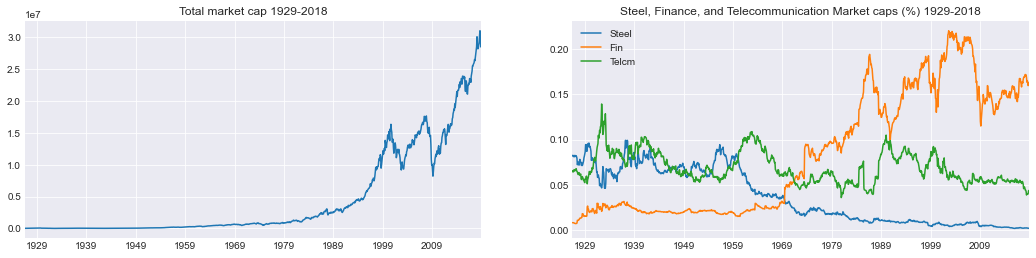

In [16]:
fig, ax = plt.subplots(1,2,figsize=(18,4)) 
total_mkt_cap.plot(grid=True, ax=ax[0]) 
ax[0].set_title("Total market cap 1929-2018")

ind_cap_weights[["Steel","Fin","Telcm"]].plot(grid=True, ax=ax[1])
ax[1].set_title("Steel, Finance, and Telecommunication Market caps (%) 1929-2018")
plt.show()

در نمودار سمت چپ، کل ارزش بازار از 1929 تا 2018 را داریم. در سمت راست، ارزش بازار فولاد،  مالی و مخابرات 1929-2018 را به عنوان درصدی از کل ارزش بازار داریم.

به عنوان مثال، توجه کنید که در حالی که بخش مالی در سال 1929 حدود 3٪ از کل ارزش بازار بود، در سال 2018 بیش از 15٪ بود. از سوی دیگر، بخش فولاد در سال 1929 حدود 9 درصد بود تا اینکه در سال 2018 به 0.2 درصد کاهش یافت.

اکنون، کل بازده بازار، یعنی سری زمانی بازده از کل بازار را پیدا کنیم. این به سادگی مجموع اوزان هر بخش ضربدر بازده ماهانه مربوطه آنهاست.

وقتی سری بازده کل بازار را داشتیم، می‌توانیم آن را ترکیب کرده و شاخص کل بازار را به دست آوریم (چیزی که در جلسات قبل **ثروت** نامیدیم):

In [17]:
total_market_return = (ind_cap_weights * ind_rets).sum(axis=1)

# فرض کنید 1000 دلار سرمایه در بازار سرمایه گذاری کرده ایم
capital = 1000
total_market_index = capital * (1 + total_market_return).cumprod()

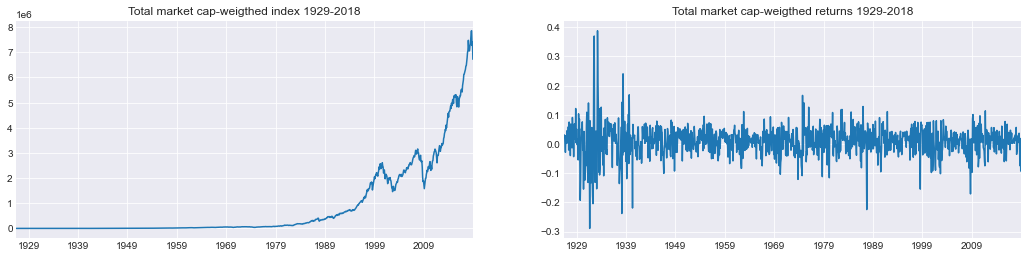

In [18]:
fig, ax = plt.subplots(1,2,figsize=(18,4)) 

total_market_index.plot(grid=True, ax=ax[0]) 
ax[0].set_title("Total market cap-weigthed index 1929-2018")

total_market_return.plot(grid=True, ax=ax[1])
ax[1].set_title("Total market cap-weigthed returns 1929-2018")

plt.show()

در مرحله بعد، ما باید ببینیم که چگونه بازده با همبستگی های بازار مرتبط است.

### Rolling returns

اجازه دهید شاخص کل بازار را رسم کنیم، مثلاً از سال 1990، و چند میانگین متحرک  مربوط به 60، 36، و 12 ماه (یعنی 5، 3 و 1 سال) را با هم ترسیم کنیم.

**rolling** ===> از این متد استفاده میکنیم

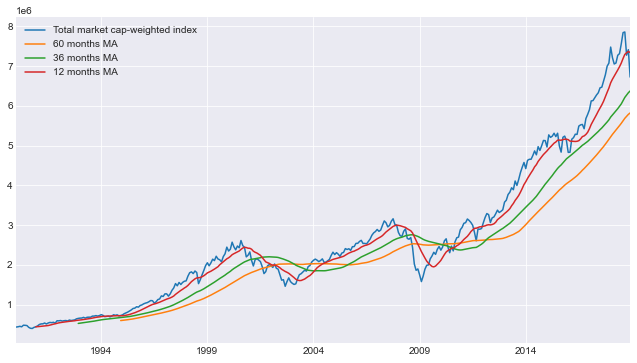

In [19]:
total_market_index["1990":].plot(grid=True, figsize=(11,6), label="Total market cap-weighted index")

total_market_index["1990":].rolling(window=60).mean().plot(grid=True, figsize=(11,6), label="60 months MA") # 5 years MA
total_market_index["1990":].rolling(window=36).mean().plot(grid=True, figsize=(11,6), label="36 months MA") # 3 years MA
total_market_index["1990":].rolling(window=12).mean().plot(grid=True, figsize=(11,6), label="12 months MA") # 1 year MA

plt.legend()
plt.show()

خوب. اکنون بازده مرکب 36 ماهه از بازده کل بازار را محاسبه کنید. یعنی مجموعه بازده کل بازار را می گیریم و پنجره های رولینگ را برای 36 ماه باز می کنیم.

**aggregate** ===> سپس، برای هر پنجره (با استفاده از این متد ) بازده ها را ترکیب می کنیم:


In [20]:
tmi_trail_36_rets = total_market_return.rolling(window=36).aggregate( msj.annualize_rets, periods_per_year=12 )

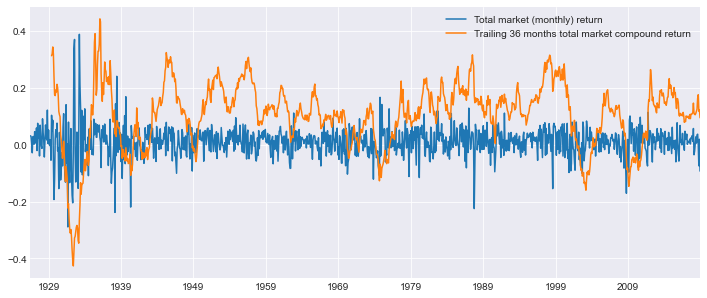

In [21]:
# رسم آن ها
total_market_return.plot(grid=True, figsize=(12,5), label="Total market (monthly) return")
tmi_trail_36_rets.plot(grid=True, figsize=(12,5), label="Trailing 36 months total market compound return")
plt.legend()
plt.show()

### Rolling correlations: multi-indices and groupby

corr() ===>  اکنون همبستگی های چرخشی(پنجره ای) را در بین صنایع محاسبه کنیم، به همان روشی که بازده ترکیبی 36 ماهه را محاسبه کرده ایم. ما از روش استفاده می کنیم که همبستگی زوجی بین ستون های دیتافریم را محاسبه می کند.

In [24]:
rets_trail_36_corr = ind_rets.rolling(window=36).corr()
rets_trail_36_corr.index.names = ["date","industry"]
rets_trail_36_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [25]:
rets_trail_36_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

چارچوب داده بالا یک سری زمانی از ماتریس های همبستگی است. یعنی هر ماتریس نشان دهنده ماتریس همبستگی 36 ماهه بازده ترکیبی صنایع برای هر داده موجود است.


توجه شود که به دلیل ساختار چنین چارچوب داده ای، یک شاخص دوگانه داریم:در هر تاریخ شاخص، مجموعه ای از صنایع شاخص را داریم.


در مرحله بعد، می خواهیم میانگین همه این ماتریس های همبستگی را برای هر تاریخ ببینیم.

**groupby by date** ===> برای انجام این کار، ابتدا ماتریس های همبستگی منفرد را با استفاده از این متد بدست می آوریم

و میانگین آنها را می گیریم

نتیجه یک سری پانداسی می باشد

In [26]:
ind_trail_36_corr = rets_trail_36_corr.groupby(level="date").apply(lambda corrmat: corrmat.values.mean())

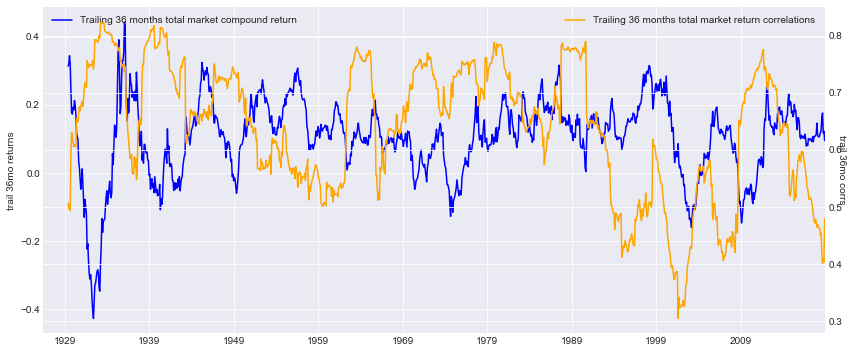

In [27]:
fig, ax1 = plt.subplots(1,1,figsize=(14,6))

tmi_trail_36_rets.plot(ax=ax1, color="blue", grid=True, label="Trailing 36 months total market compound return")
ax2 = ax1.twinx()
ind_trail_36_corr.plot(ax=ax2, color="orange", grid=True, label="Trailing 36 months total market return correlations")

ax1.set_ylabel('trail 36mo returns')
ax2.set_ylabel('trail 36mo corrs',rotation=-90)
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

به عنوان مثال، در طول بحران 1929، می بینیم که زمانی که بازده کل بازار (پس از 36 ماه) کاهش می یابد، میانگین همبستگی صنایع بازار افزایش می یابد و زمانی که بازده بهبود می یابد، همبستگی ها کاهش می یابد.

این را می توان در بحران کمپانی لمن-برادرز نیز مشاهده کرد. هنگامی که در سال 2007 بازده شروع به کاهش کرد، همبستگی افزایش یافت.

وقتی این اتفاق می افتد، ما به سادگی متوجه محدودیت های تنوع می شویم. بازده از کل سقوط بازار به این معنی است که به طور متوسط، همه صنایع در بازار متحمل ضرر می شوند، یعنی همبستگی آنها افزایش می یابد، و واقعاً مهم نیست که پرتفوی چقدر متنوع است. در هنگام سقوط بازار، تنوع ممکن است به شما کمکی نکند.


با این حال، همیشه اینطور نیست: به بحران دات کام از سال 1999 نگاه کنید. بازده ها و همبستگی ها از همین روند پیروی می کنند و نشان می دهد که در این مورد تنوع می تواند به توقف ضرر کمک کند…

یا مثالی از بورس ایران:

<img src="shakhes kol.png" width="800" height="300">
<img src="nori.png" width="800" height="300">

به صورت کلی

In [28]:
tmi_trail_36_rets.corr(ind_trail_36_corr)

-0.28010065062884

یعنی همبستگی بین سری بازده مرکب (پس از 36 ماه) و سری همبستگی‌های متوسط (یعنی محاسبه همبستگی بین بازده ها و همبستگی صنایع) در بین صنایع منفی است.